# 按出發時間分類

**出發時間資料處理**

In [26]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 載入資料並刪除價格歷史為空的列
data = pd.read_csv('/Users/yuchingchen/Documents/專題/cleaned_data/sydney.csv')

# 分類出發時間
def classify_time_period(departure_time):
    if "清晨" in departure_time or "凌晨" in departure_time:
        hour = int(departure_time.split("清晨")[-1].split(":")[0]) if "清晨" in departure_time else int(departure_time.split("凌晨")[-1].split(":")[0])
        if 0 <= hour < 6:
            return "凌晨班機"
    if "早上" in departure_time or "上午" in departure_time or "清晨" in departure_time:
        hour = int(departure_time.split(":")[0].split("清晨")[-1].split("早上")[-1].split("上午")[-1])
        if 6 <= hour < 9:
            return "早晨班機"
        elif 9 <= hour < 12:
            return "上午班機"
    if "下午" in departure_time:
        hour = int(departure_time.split("下午")[-1].split(":")[0]) + 12
        if 12 <= hour < 18:
            return "下午班機"
    if "晚上" in departure_time or "晚間" in departure_time:
        hour = int(departure_time.split("晚上")[-1].split("晚間")[-1].split(":")[0]) + 12
        if 18 <= hour < 24:
            return "晚間班機"
    return None

# 新增時段欄位
data["出發時段"] = data["出發時間"].apply(classify_time_period)

# 計算對數變數
data["平均價格_log"] = data["平均價格"].apply(lambda x: np.log1p(x) if pd.notnull(x) else np.nan)
data["最低價格_log"] = data["最低價格"].apply(lambda x: np.log1p(x) if pd.notnull(x) else np.nan)
data["價格變異_log"] = data["價格變異"].apply(lambda x: np.log1p(x) if pd.notnull(x) else np.nan)
data["中位數價格_log"] = data["中位數價格"].apply(lambda x: np.log1p(x) if pd.notnull(x) else np.nan)
data["最低價格剩餘天數_inv"] = data["最低價格剩餘天數"].apply(lambda x: 1/x if pd.notnull(x) and x != 0 else np.nan)

# 移除包含 NaN 的數據
plot_data = data.dropna(subset=["平均價格_log", "最低價格_log", "最低價格剩餘天數_inv", "價格變異_log", "中位數價格_log", "出發時段"])

# 顯示各時段有幾筆資料
time_period_count = data["出發時段"].value_counts().reset_index()
time_period_count.columns = ["出發時段", "筆數"]
print(time_period_count)

   出發時段    筆數
0  下午班機  1488
1  晚間班機   876
2  上午班機   691
3  早晨班機   636
4  凌晨班機    82


**Boxplot（按出發時間分類）**

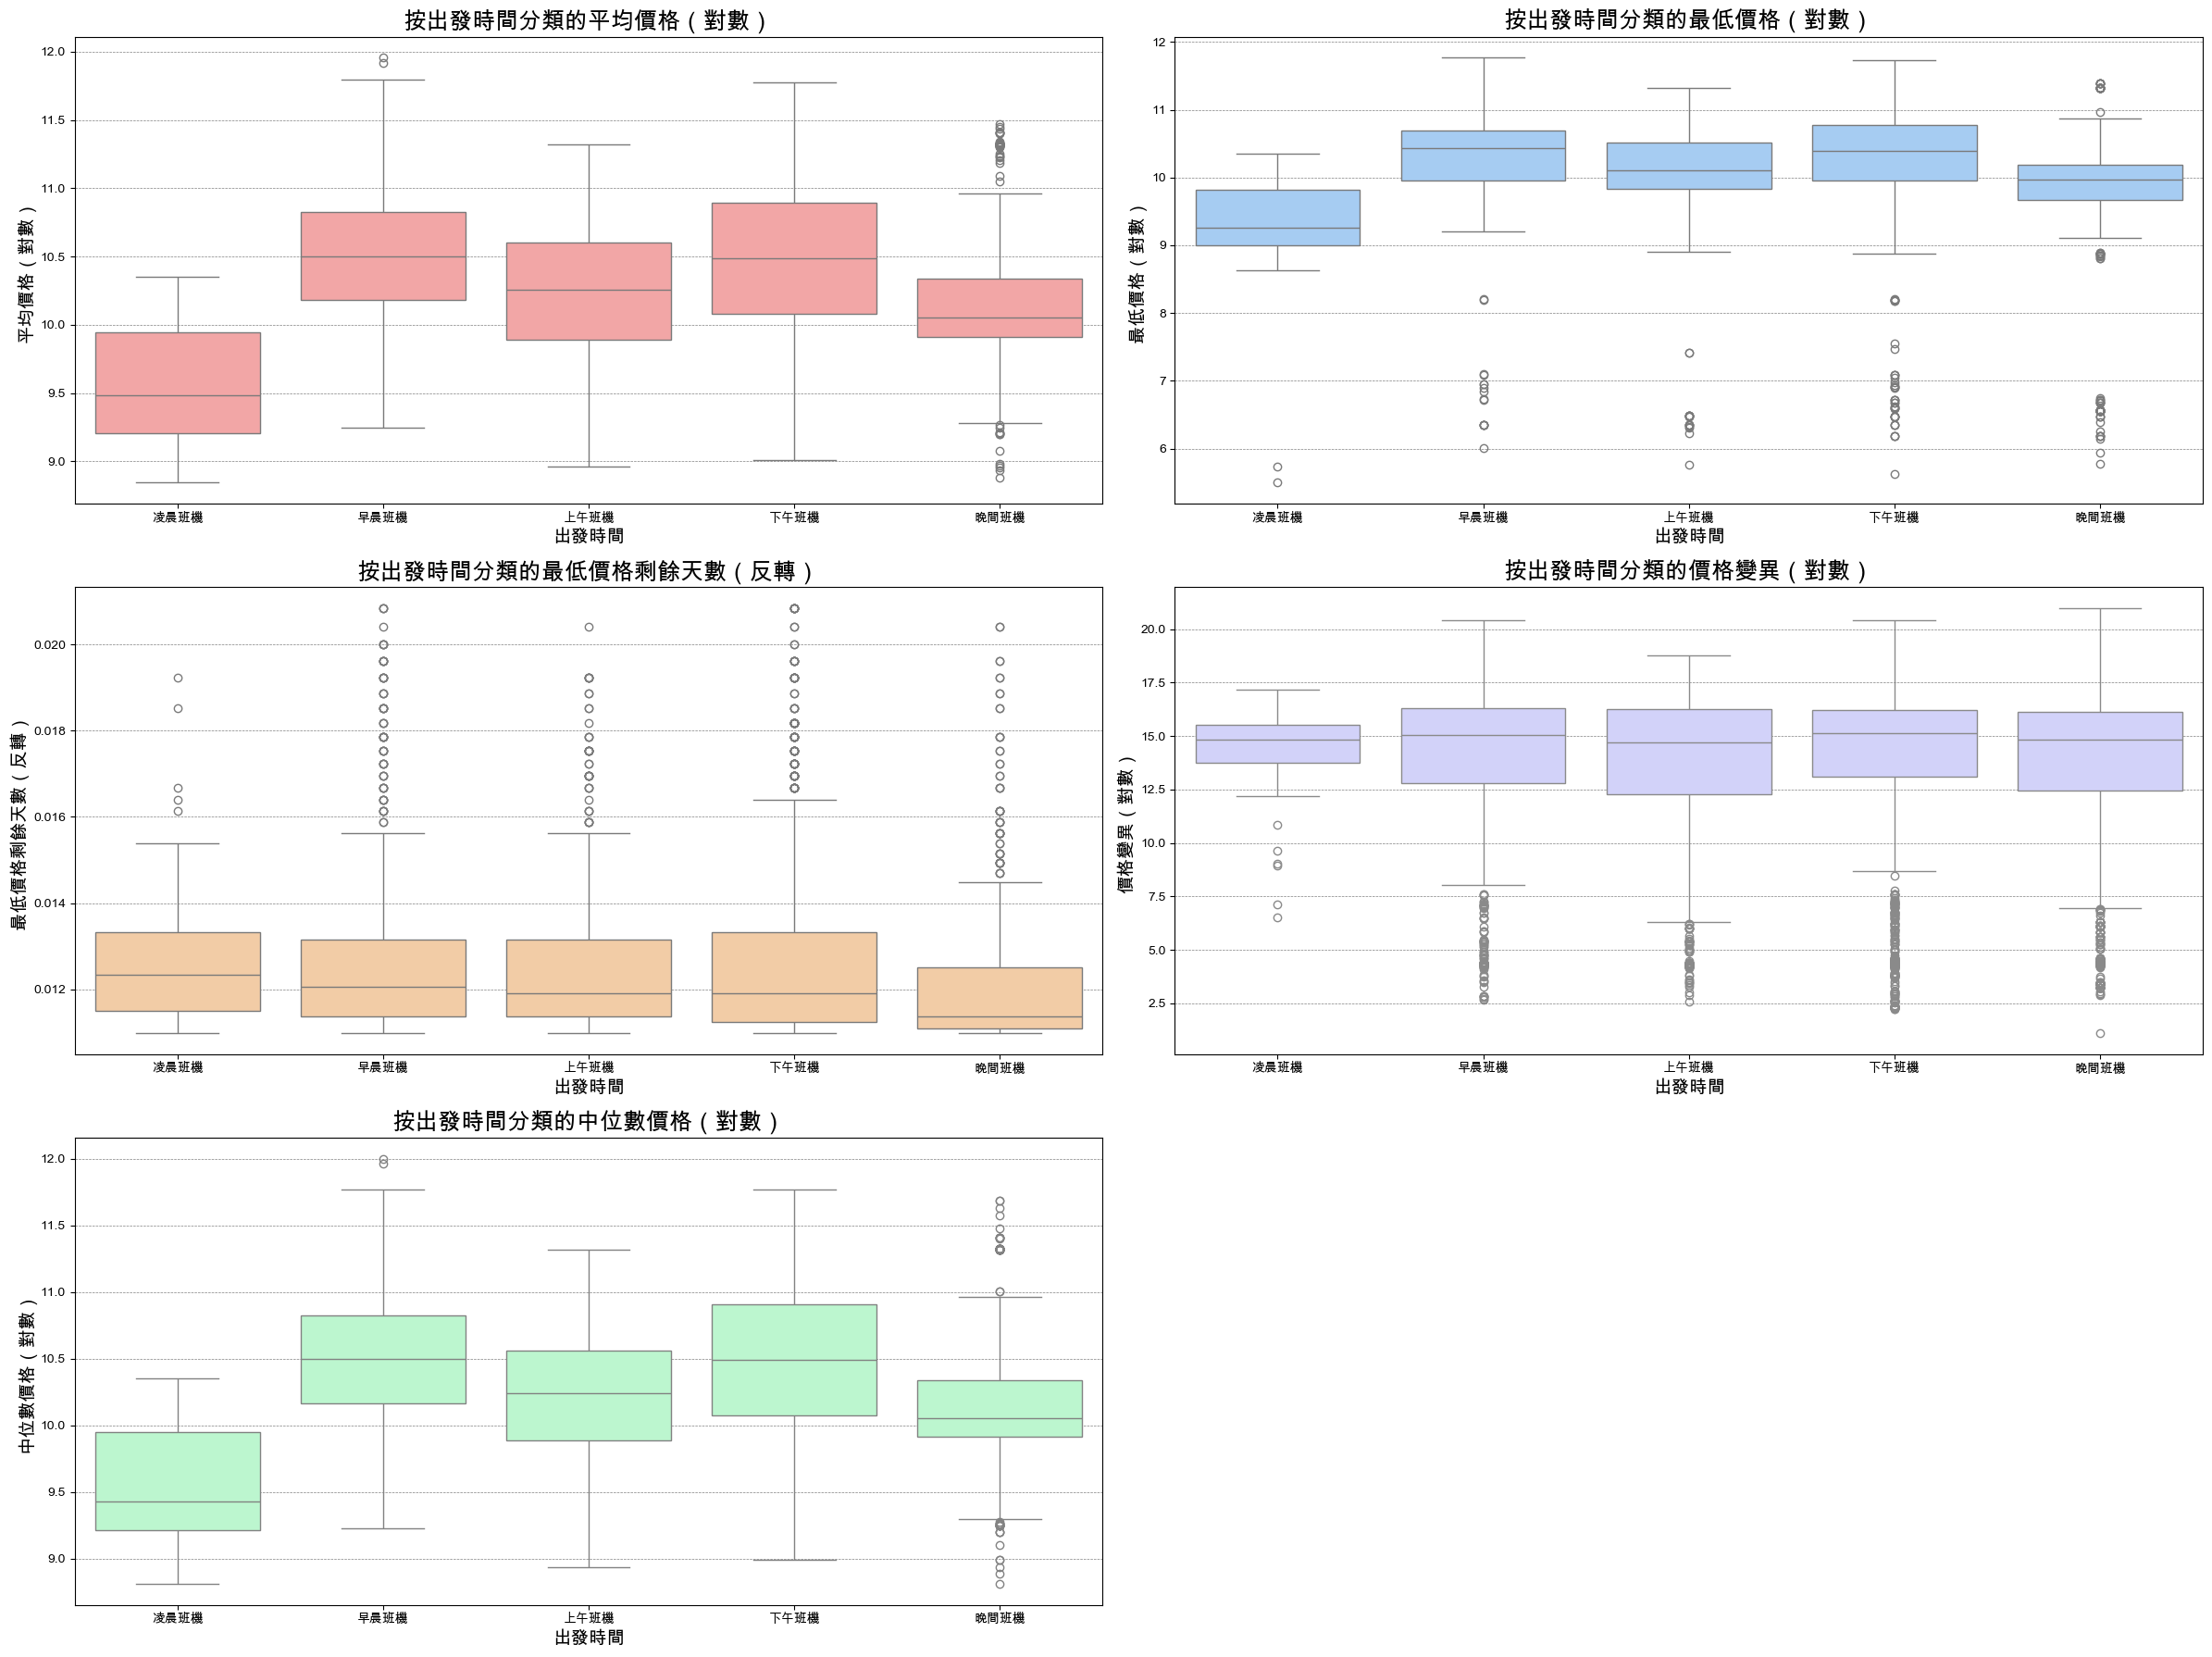

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 確保時段順序為固定排序
time_order = ["凌晨班機", "早晨班機", "上午班機", "下午班機", "晚間班機"]
plot_data['出發時段'] = pd.Categorical(plot_data['出發時段'], categories=time_order, ordered=True)

# 確認排序
plot_data = plot_data.sort_values(by='出發時段')

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(24, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按出發時間分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='出發時段', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按出發時間分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按出發時間分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='出發時段', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按出發時間分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('出發時間', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按出發時間分類的最低價格剩餘天數（反轉）的盒狀圖
sns.boxplot(data=plot_data, x='出發時段', y='最低價格剩餘天數_inv', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按出發時間分類的最低價格剩餘天數（反轉）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按出發時間分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='出發時段', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按出發時間分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('出發時間', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按出發時間分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='出發時段', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按出發時間分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**常態檢定**

In [30]:
from scipy.stats import shapiro
import numpy as np

# 變數
variables_log = {
    '平均價格_log': plot_data['平均價格_log'],
    '最低價格_log': plot_data['最低價格_log'],
    '最低價格剩餘天數_inv': plot_data['最低價格剩餘天數_inv'],
    '價格變異_log': plot_data['價格變異_log'],
    '中位數價格_log': plot_data['中位數價格_log'],
}

# 對每個變數進行 Shapiro-Wilk 檢定
for var_name, data in variables_log.items():
    stat, p_value = shapiro(data)
    print(f"{var_name} 的 Shapiro-Wilk 檢定 P 值: {p_value}")
    if p_value > 0.05:
        print(f"{var_name} 接近正態分佈")
    else:
        print(f"{var_name} 顯著偏離正態分佈")

平均價格_log 的 Shapiro-Wilk 檢定 P 值: 4.635375429145467e-31
平均價格_log 顯著偏離正態分佈
最低價格_log 的 Shapiro-Wilk 檢定 P 值: 2.097422119868786e-53
最低價格_log 顯著偏離正態分佈
最低價格剩餘天數_inv 的 Shapiro-Wilk 檢定 P 值: 8.184566293429233e-59
最低價格剩餘天數_inv 顯著偏離正態分佈
價格變異_log 的 Shapiro-Wilk 檢定 P 值: 3.439455970348023e-54
價格變異_log 顯著偏離正態分佈
中位數價格_log 的 Shapiro-Wilk 檢定 P 值: 2.551284999149711e-31
中位數價格_log 顯著偏離正態分佈


**取對數：顯著偏離正態分佈 用 Kruskal-Wallis Test**

In [34]:
from scipy.stats import kruskal

# Kruskal-Wallis 檢定
variables_log = {
    '平均價格_log': plot_data['平均價格_log'],
    '最低價格_log': plot_data['最低價格_log'],
    '最低價格剩餘天數_inv': plot_data['最低價格剩餘天數_inv'],
    '價格變異_log': plot_data['價格變異_log'],
    '中位數價格_log': plot_data['中位數價格_log'],
}

kruskal_results = {}

for var_name, data_column in variables_log.items():
    groups = [
        data_column[plot_data['出發時段'] == time_period]
        for time_period in plot_data['出發時段'].unique()
    ]
    stat, p_value = kruskal(*groups)
    kruskal_results[var_name] = {'統計量': stat, 'p 值': p_value}
    if p_value < 0.05:
        print(f"{var_name} 的 Kruskal-Wallis 檢定 P 值: {p_value:.4e}，顯著差異")
    else:
        print(f"{var_name} 的 Kruskal-Wallis 檢定 P 值: {p_value:.4e}，無顯著差異")

平均價格_log 的 Kruskal-Wallis 檢定 P 值: 7.1924e-111，顯著差異
最低價格_log 的 Kruskal-Wallis 檢定 P 值: 3.7160e-107，顯著差異
最低價格剩餘天數_inv 的 Kruskal-Wallis 檢定 P 值: 1.0056e-27，顯著差異
價格變異_log 的 Kruskal-Wallis 檢定 P 值: 1.4327e-02，顯著差異
中位數價格_log 的 Kruskal-Wallis 檢定 P 值: 6.4879e-109，顯著差異


**Boxplot/Histogram**
（按出發時間分類）

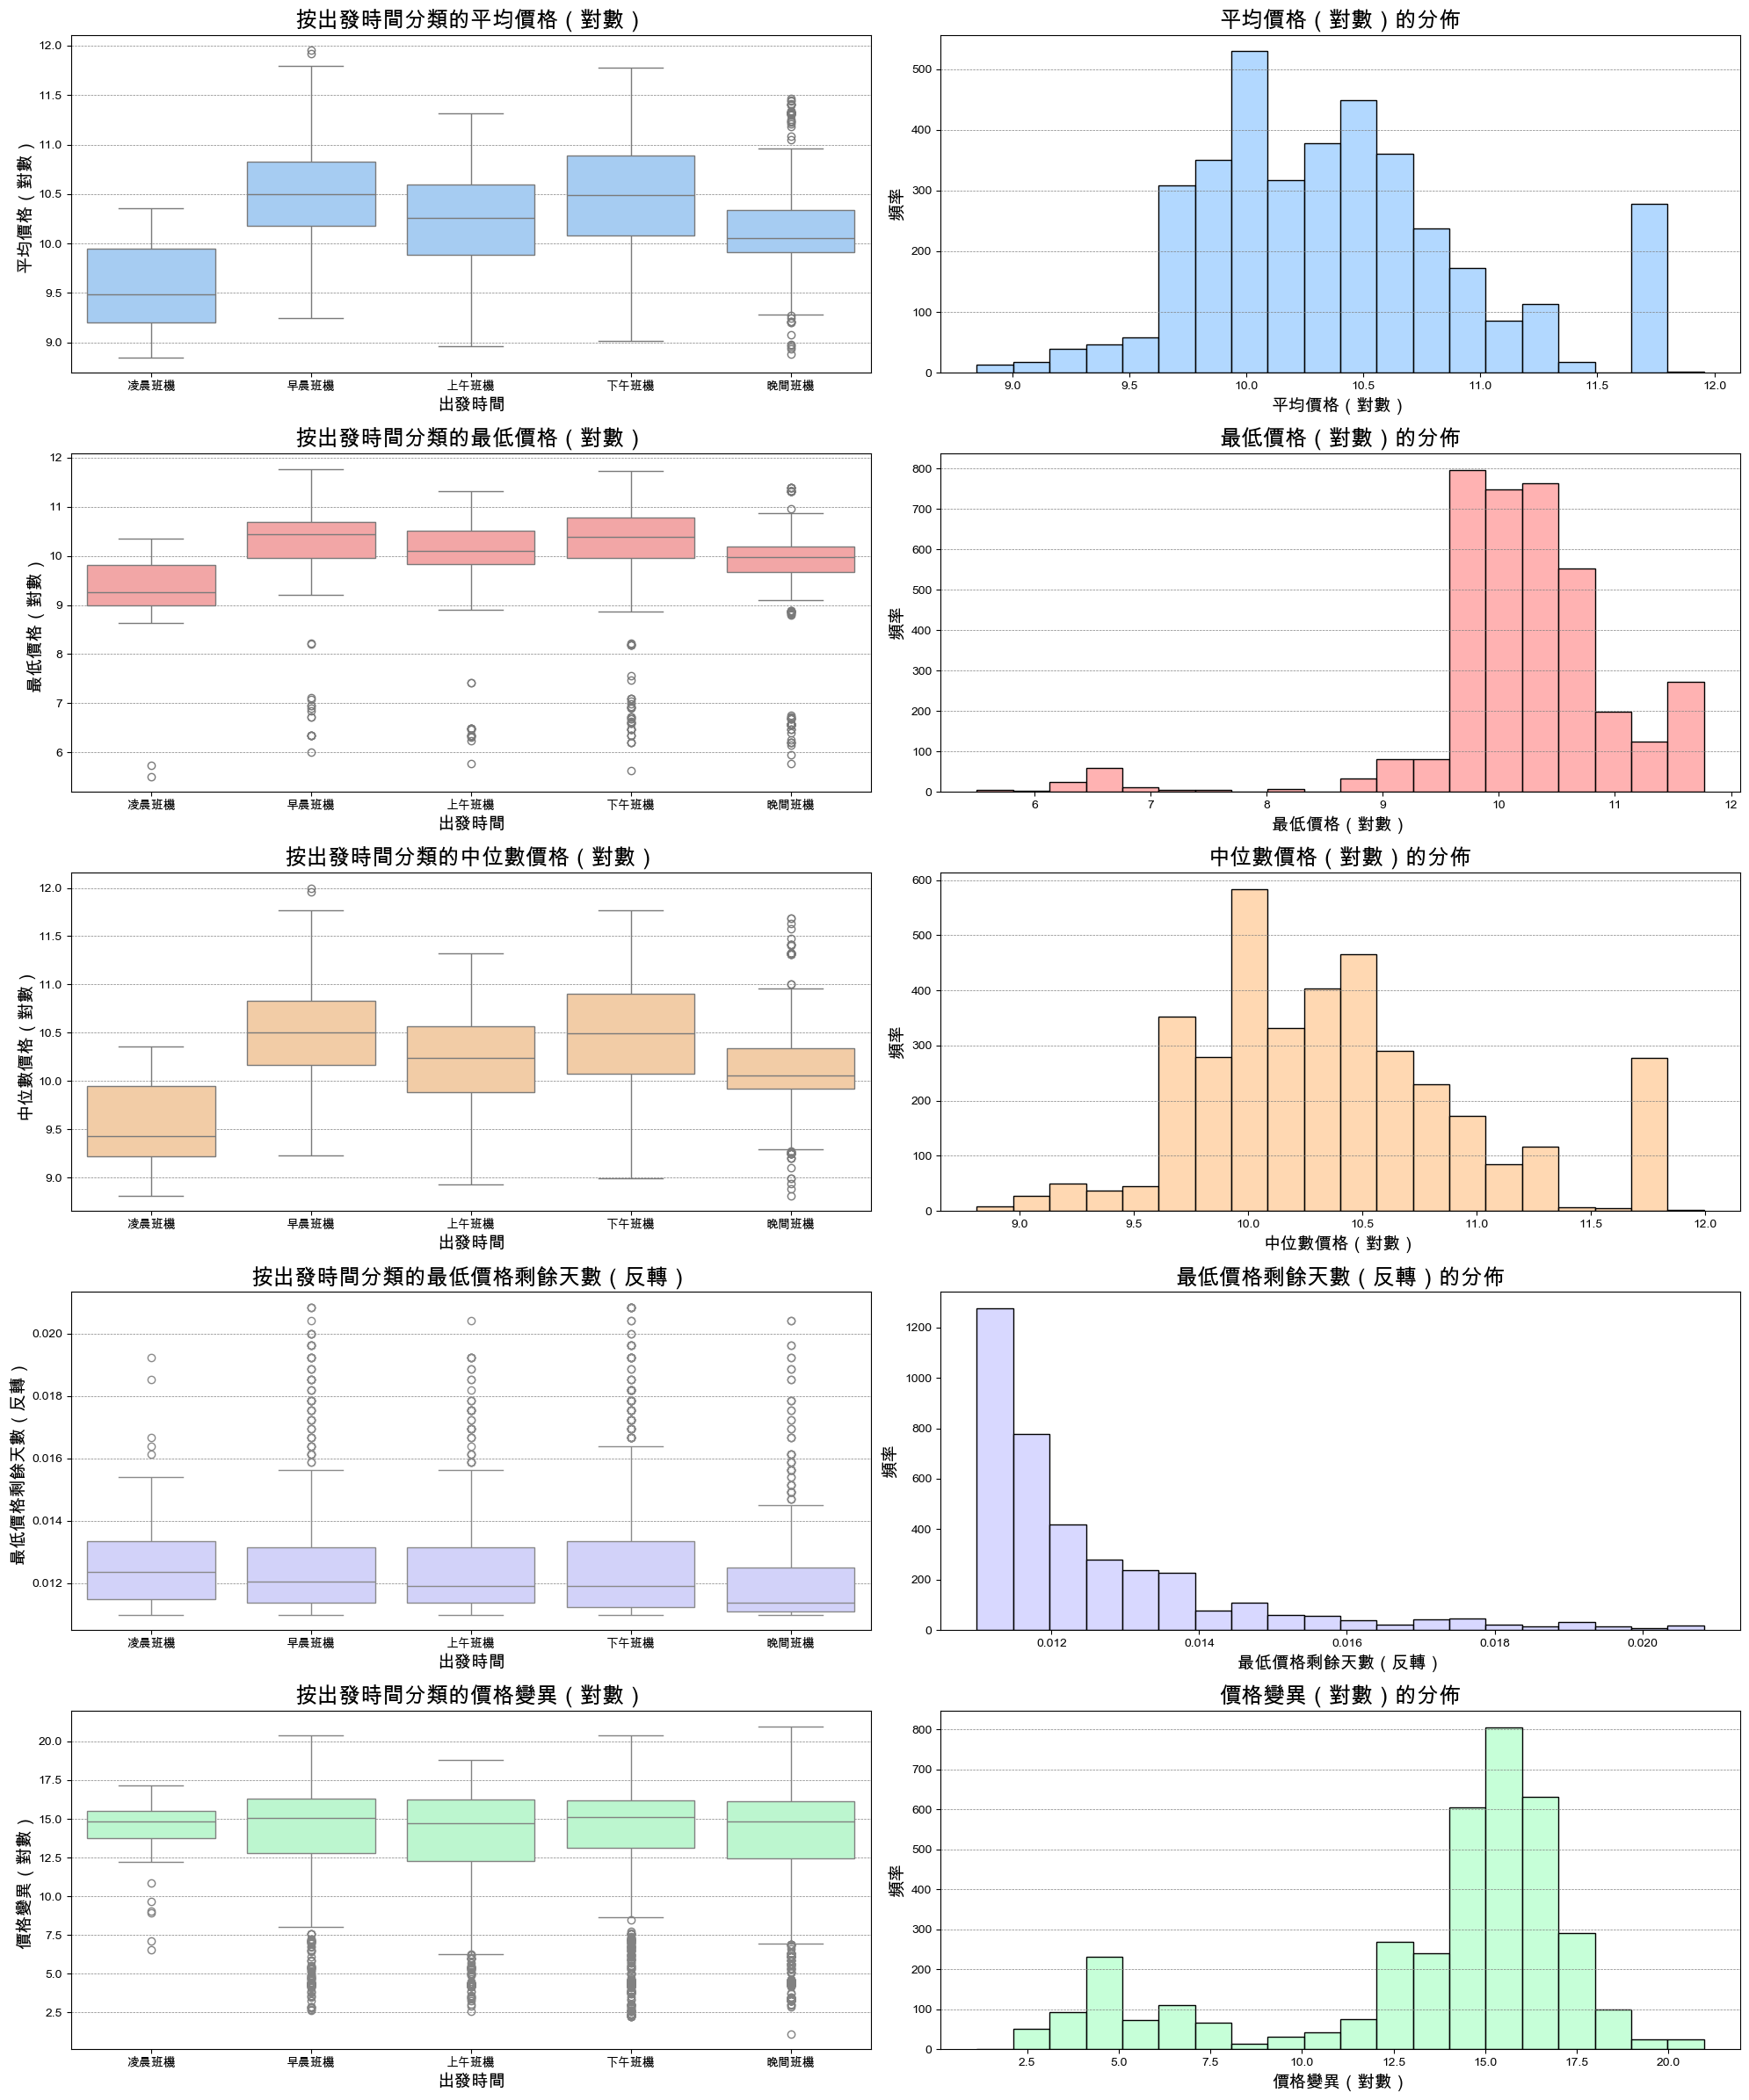

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 創建 5x2 子圖
fig, axes = plt.subplots(5, 2, figsize=(20, 24))

# 調整字體大小
title_fontsize = 18
label_fontsize = 14

# 第一行子圖：出發時間分類的平均價格（對數）
sns.boxplot(data=plot_data, x='出發時段', y='平均價格_log', ax=axes[0, 0], color='#99CCFF')
axes[0, 0].set_title('按出發時間分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['平均價格_log'], kde=False, color='#99CCFF', ax=axes[0, 1], bins=20)
axes[0, 1].set_title('平均價格（對數）的分佈', fontsize=title_fontsize)
axes[0, 1].set_xlabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二行子圖：出發時間分類的最低價格（對數）
sns.boxplot(data=plot_data, x='出發時段', y='最低價格_log', ax=axes[1, 0], color='#FF9999')
axes[1, 0].set_title('按出發時間分類的最低價格（對數）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格_log'], kde=False, color='#FF9999', ax=axes[1, 1], bins=20)
axes[1, 1].set_title('最低價格（對數）的分佈', fontsize=title_fontsize)
axes[1, 1].set_xlabel('最低價格（對數）', fontsize=label_fontsize)
axes[1, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三行子圖：出發時間分類的中位數價格（對數）
sns.boxplot(data=plot_data, x='出發時段', y='中位數價格_log', ax=axes[2, 0], color='#FFCC99')
axes[2, 0].set_title('按出發時間分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['中位數價格_log'], kde=False, color='#FFCC99', ax=axes[2, 1], bins=20)
axes[2, 1].set_title('中位數價格（對數）的分佈', fontsize=title_fontsize)
axes[2, 1].set_xlabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[2, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四行子圖：出發時間分類的最低價格剩餘天數（反轉）
sns.boxplot(data=plot_data, x='出發時段', y='最低價格剩餘天數_inv', ax=axes[3, 0], color='#CCCCFF')
axes[3, 0].set_title('按出發時間分類的最低價格剩餘天數（反轉）', fontsize=title_fontsize)
axes[3, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[3, 0].set_ylabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[3, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['最低價格剩餘天數_inv'], kde=False, color='#CCCCFF', ax=axes[3, 1], bins=20)
axes[3, 1].set_title('最低價格剩餘天數（反轉）的分佈', fontsize=title_fontsize)
axes[3, 1].set_xlabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[3, 1].set_ylabel('頻率', fontsize=label_fontsize)

# 第五行子圖：出發時間分類的價格變異（對數）
sns.boxplot(data=plot_data, x='出發時段', y='價格變異_log', ax=axes[4, 0], color='#B3FFCC')
axes[4, 0].set_title('按出發時間分類的價格變異（對數）', fontsize=title_fontsize)
axes[4, 0].set_xlabel('出發時間', fontsize=label_fontsize)
axes[4, 0].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

sns.histplot(plot_data['價格變異_log'], kde=False, color='#B3FFCC', ax=axes[4, 1], bins=20)
axes[4, 1].set_title('價格變異（對數）的分佈', fontsize=title_fontsize)
axes[4, 1].set_xlabel('價格變異（對數）', fontsize=label_fontsize)
axes[4, 1].set_ylabel('頻率', fontsize=label_fontsize)
axes[4, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 自動調整子圖間距
plt.tight_layout()
plt.show()